# Import Libraries

In [ ]:
# mathematics functions
import numpy as np
# data structures and analysis
import pandas as pd
# ploting
import matplotlib.pyplot as plt
# fancy ploting
import seaborn as sns
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#pre prossessing and optimization
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [ ]:
# performance metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, make_scorer, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, mean_squared_error
from yellowbrick.classifier import ClassificationReport

In [ ]:
# Model visualization
import pydotplus
from IPython.display import Image, SVG
from io import StringIO
from sklearn.tree import export_graphviz
from graphviz import Source

# Read Data

In [ ]:
credit_df = pd.read_csv('./data/credit.csv')
credit_df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
credit_df.drop(['ID'],axis = 1,inplace = True)
#removing ["MARRIAGE"] == 0 and  ["EDUCATION"] == 0
credit_df = credit_df.loc[(credit_df['EDUCATION'] != 0) & (credit_df['MARRIAGE'] != 0)]
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Preprocessing

In [ ]:
# OneHot encoding
credit_df = pd.get_dummies(credit_df,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6'], drop_first=True)
credit_df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_5'

In [ ]:
# split dataset into train and test sets
X = credit_df.drop(["DEFAULT"],axis=1)
y = credit_df["DEFAULT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

prediction = dict()


In [ ]:
# SMOTE (if we want to use to balance the minority class)
# used only on train set
# increase minority class sample size to the same as majority class
smote = SMOTE(sampling_strategy='minority', random_state = 2)
X_train_sm , y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()


,count
DEFAULT,
0,17483
1,17483


In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (22449, 80)
Number transactions y_train dataset:  (22449,)
Number transactions X_test dataset:  (7483, 80)
Number transactions y_test dataset:  (7483,)


# Decision Tree

In [ ]:
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)
# Train the estimator.
tr.fit(X_train, y_train)
tr_pred=tr.predict(X_test)

In [ ]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# Precision
print('Precision: %.3f' % precision_score(y_test, tr_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, tr_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, tr_pred))

# MSE
print('MSE: %.3f' % mean_squared_error(y_test, tr_pred))

Accuracy: 0.820
Precision: 0.733
Recall: 0.298
F1 score: 0.424
MSE: 0.180


/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


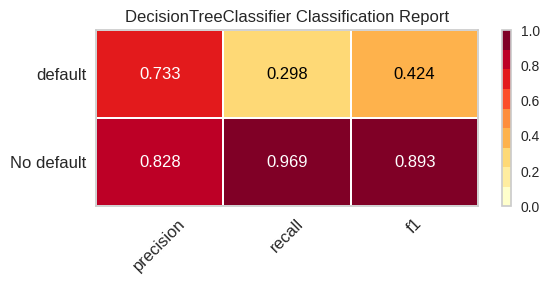

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [ ]:
# Classification Report
mapping = {0: "No default", 1:"default"}

fig, ax = plt.subplots(figsize=(6,3))
cm_viz = ClassificationReport(tr,classes=["No default","default"], label_encoder=mapping)
cm_viz.score(X_test,y_test)
cm_viz.show()


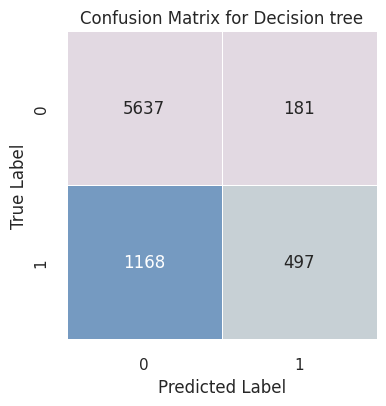

In [ ]:
# Plot confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test,tr_pred)
sns.set(font_scale=1)
plt.subplots(figsize=(4, 4))
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

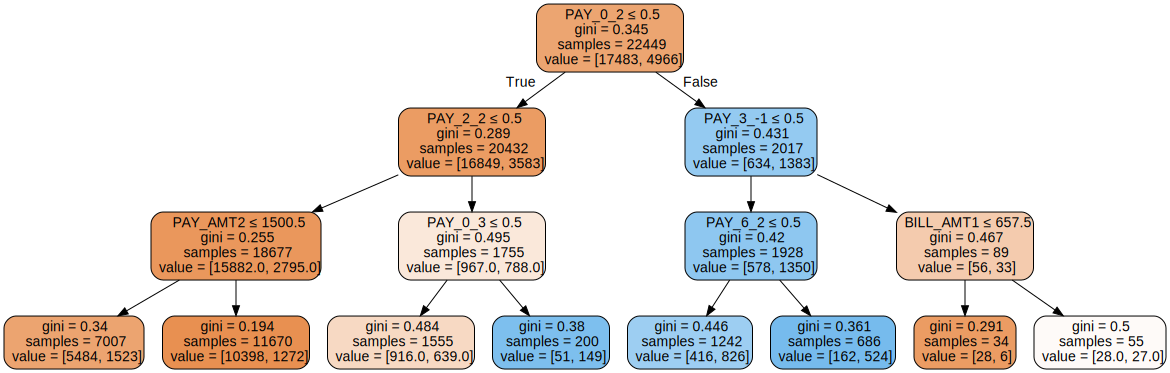

In [ ]:

dot_data = tree.export_graphviz(tr, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = Source(dot_data)
graph


# Decision Tree - SMOTE

In [ ]:
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)
# Train the estimator.
tr.fit(X_train_sm, y_train_sm.values)
tr_pred=tr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


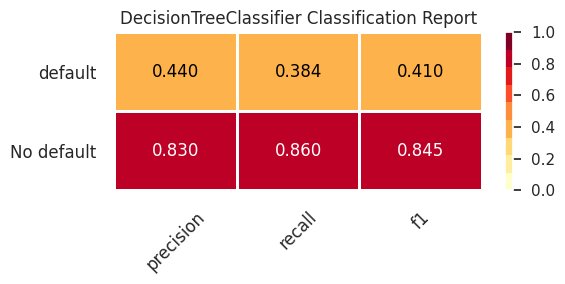

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [ ]:
# Classification Report
mapping = {0: "No default", 1:"default"}

fig, ax = plt.subplots(figsize=(6,3))
cm_viz = ClassificationReport(tr,classes=["No default","default"], label_encoder=mapping)
cm_viz.score(X_test,y_test)
cm_viz.show()

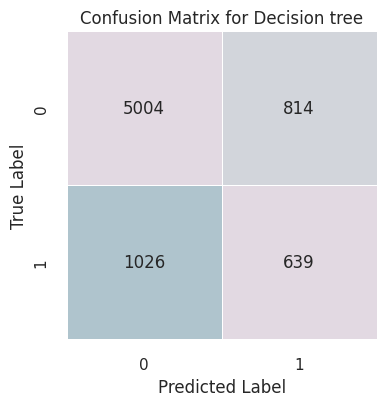

In [ ]:
# Plot confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test,tr_pred)
sns.set(font_scale=1)
plt.subplots(figsize=(4, 4))
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

# Decision Tree Optimization




In [ ]:
# Decision Tree

tr = DecisionTreeClassifier(random_state=25)

params = {'max_depth': range(4, 15, 1), 'min_samples_split': range(2, 1003, 200)}
tr_optimized = GridSearchCV(estimator=tr,
                       param_grid=params,
                       cv=5,
                       scoring='recall',
                       refit=True, verbose=0)

tr_optimized.fit(X_train_sm, y_train_sm.values.ravel())


tr_optimized_test_pred = tr_optimized.predict(X_test)

tr_optimized_test_score = accuracy_score(y_test, tr_optimized_test_pred)

print(tr_optimized_test_score)

print(classification_report(y_test, tr_optimized_test_pred))
print(confusion_matrix(y_test, tr_optimized_test_pred))
print(tr_optimized.best_params_)


0.7283175197113457
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      5818
           1       0.41      0.51      0.46      1665

    accuracy                           0.73      7483
   macro avg       0.63      0.65      0.64      7483
weighted avg       0.75      0.73      0.74      7483

[[4598 1220]
 [ 813  852]]
{'max_depth': 12, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


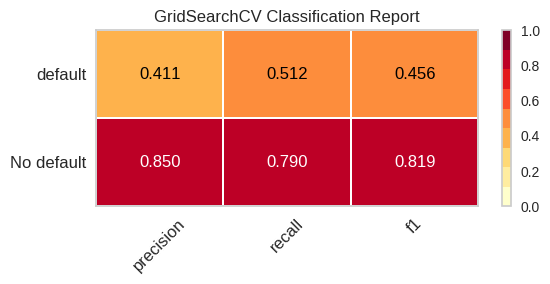

<Axes: title={'center': 'GridSearchCV Classification Report'}>

In [ ]:
mapping = {0: "No default", 1:"default"}

fig, ax = plt.subplots(figsize=(6,3))
cm_viz = ClassificationReport(tr_optimized,classes=["No default","default"], label_encoder=mapping)
cm_viz.score(X_test,y_test)
cm_viz.show()

In [ ]:
# Feature Importance
#print(tr_optimized.best_estimator_.feature_importances_)

feat_names = X.columns
#print(feat_names)
dt_feat_impt = tr_optimized.best_estimator_.feature_importances_.tolist()
#print(dt_feat_impt)

dt_feat_impt_combined = {}
for i in feat_names:
    for j in dt_feat_impt:
        dt_feat_impt_combined[i] = j
        dt_feat_impt.remove(j)
        break

# sort feat_impt_combined
dt_sorted_feat_impt = {}
dt_sorted_values = sorted(dt_feat_impt_combined.values(), reverse=True)
for value in dt_sorted_values:
    for key in dt_feat_impt_combined.keys():
        if dt_feat_impt_combined[key] == value:
            dt_sorted_feat_impt[key] = dt_feat_impt_combined[key]

print(dt_sorted_feat_impt)



{'PAY_0_0': 0.24365296270281925, 'PAY_0_-1': 0.13563732673844847, 'LIMIT_BAL': 0.07176877429257326, 'PAY_0_1': 0.05621589347347259, 'BILL_AMT1': 0.05515456403768179, 'BILL_AMT2': 0.03780908384375435, 'PAY_AMT1': 0.036680266516286114, 'PAY_AMT2': 0.03181291308740936, 'BILL_AMT3': 0.030324574551236976, 'MARRIAGE_2': 0.02922824621007823, 'AGE': 0.024660476144143028, 'PAY_AMT3': 0.02274523698718157, 'PAY_AMT4': 0.01998893452346059, 'SEX_2': 0.018475269841481207, 'BILL_AMT6': 0.01840521267627552, 'BILL_AMT4': 0.018125485590003817, 'PAY_AMT6': 0.017332624268982, 'BILL_AMT5': 0.017178155768968514, 'EDUCATION_2': 0.016935912507717758, 'PAY_AMT5': 0.01388428361561731, 'PAY_5_-1': 0.01321416088055307, 'EDUCATION_3': 0.012286065599699315, 'PAY_5_0': 0.008331632325811605, 'PAY_3_-1': 0.006048003242979604, 'PAY_0_2': 0.006029650605476667, 'PAY_4_0': 0.003900970484712626, 'PAY_3_0': 0.003852924650987777, 'PAY_6_0': 0.003672858892142575, 'PAY_3_2': 0.003097539466666092, 'PAY_6_-1': 0.0024232901940123

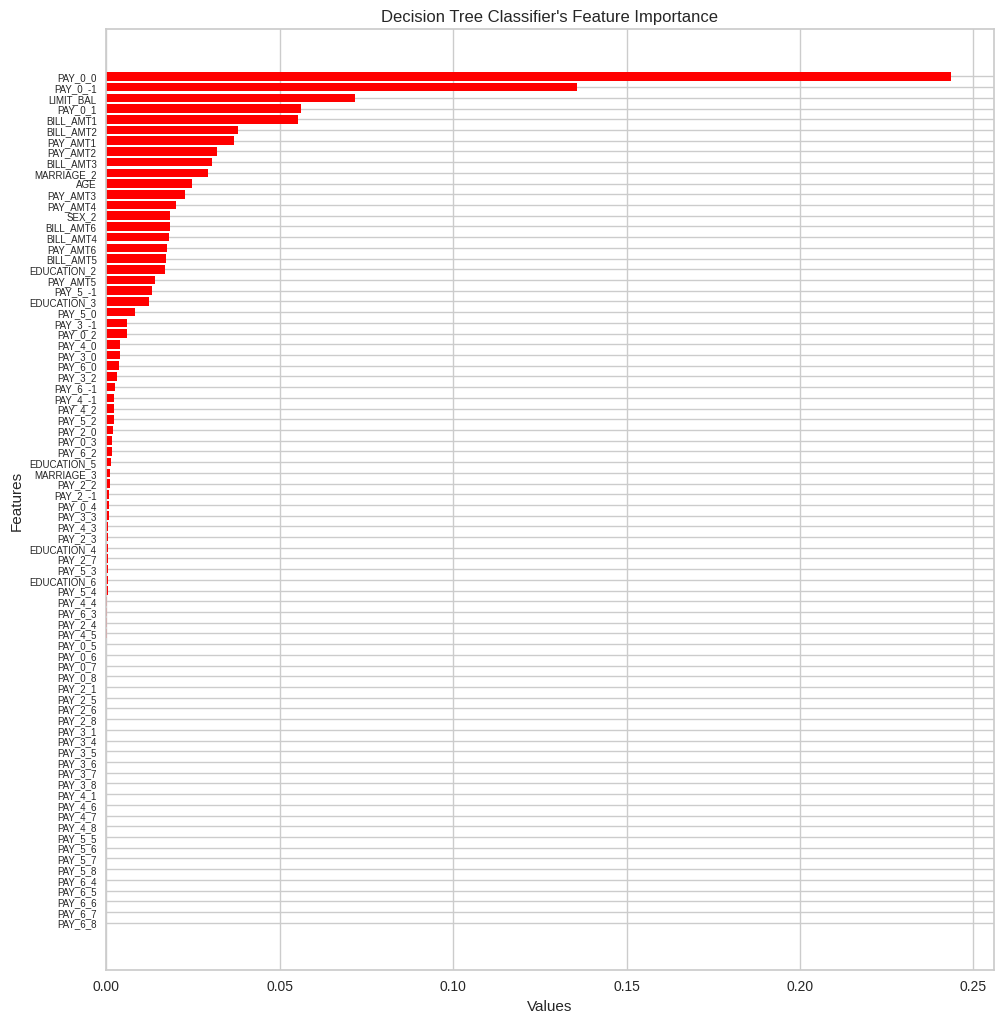

In [ ]:
# plot feature importance of decision tree

fig, ax = plt.subplots(figsize=(10, 10)) # width & height
#print(list(dt_sorted_feat_impt.keys()))
#print(list(dt_sorted_feat_impt.values()))

ax.barh(list(dt_sorted_feat_impt.keys()), list(dt_sorted_feat_impt.values()), color ="red")

ax.invert_yaxis()
plt.yticks(fontsize=7)
plt.tight_layout()
ax.set_title("Decision Tree Classifier's Feature Importance")
ax.set_xlabel("Values")
ax.set_ylabel("Features")

plt.show()
